In [25]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
print("Librarires imported")

Librarires imported


In [2]:
Image_size = 256
Batch_size = 32
Channels = 3
Epochs = 50

# Load data into Tensorflow datasets

In [3]:
tf_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/potato/Potato",
     shuffle = True,
     image_size = (Image_size,Image_size),
     batch_size = Batch_size
)

Found 2152 files belonging to 3 classes.


2022-05-28 16:20:04.836505: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
Class_names = tf_dataset.class_names
print(Class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


2022-05-28 16:20:05.020443: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


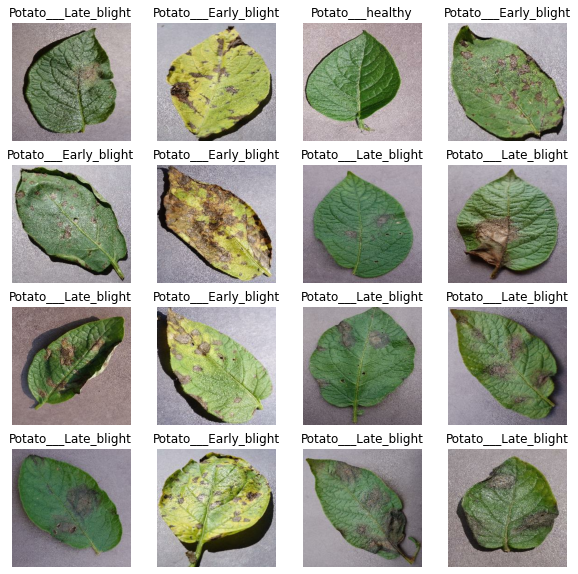

In [5]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in tf_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.title(Class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

In [6]:
len(tf_dataset)

68

# Train, Test, Validation split

In [7]:
train_ds = tf_dataset.take(54)
len(train_ds)

54

In [8]:
test_ds = tf_dataset.skip(54)
validation_ds = test_ds.take(6)
test_ds = test_ds.skip(6)
print(len(test_ds))
print(len(validation_ds))

8
6


In [9]:
def get_train_test_split(df, train_split = 0.8, test_split = 0.1, val_split = 0.1, shuffle = True):
    """
    please implement this  
    
    """

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size, Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Create CNN model

In [13]:
input_shape = (Batch_size,Image_size, Image_size, 3)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [15]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

# Train CNN model

In [16]:
history = model.fit(
    train_ds,
    epochs = 10,
    batch_size = Batch_size,
    verbose = 1,
    validation_data = validation_ds
)

Epoch 1/10
54/54 [==============================] - 90s 2s/step - loss: 0.8095 - accuracy: 0.5990 - val_loss: 0.6026 - val_accuracy: 0.7500
Epoch 2/10
54/54 [==============================] - 78s 1s/step - loss: 0.4134 - accuracy: 0.8339 - val_loss: 0.3137 - val_accuracy: 0.8802
Epoch 3/10
54/54 [==============================] - 77s 1s/step - loss: 0.2923 - accuracy: 0.8895 - val_loss: 0.2599 - val_accuracy: 0.8854
Epoch 4/10
54/54 [==============================] - 76s 1s/step - loss: 0.2097 - accuracy: 0.9184 - val_loss: 0.2029 - val_accuracy: 0.9323
Epoch 5/10
54/54 [==============================] - 78s 1s/step - loss: 0.1624 - accuracy: 0.9456 - val_loss: 0.1547 - val_accuracy: 0.9323
Epoch 6/10
54/54 [==============================] - 77s 1s/step - loss: 0.1751 - accuracy: 0.9358 - val_loss: 0.1417 - val_accuracy: 0.9427
Epoch 7/10
54/54 [==============================] - 79s 1s/step - loss: 0.1516 - accuracy: 0.9404 - val_loss: 0.1415 - val_accuracy: 0.9427
Epoch 8/10
54/54 [==

# Ploting training and validation Accuracy

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

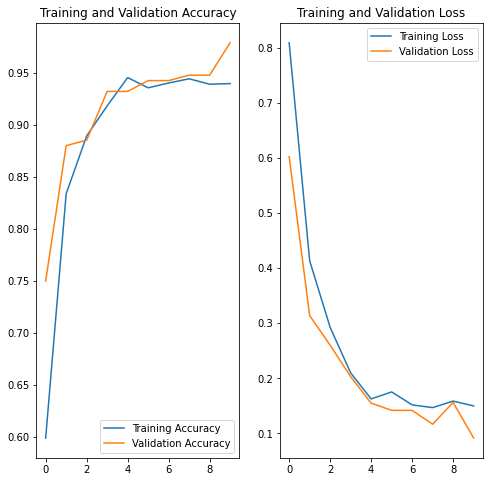

In [18]:
EPOCHS = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Method to inference on new data

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = Class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

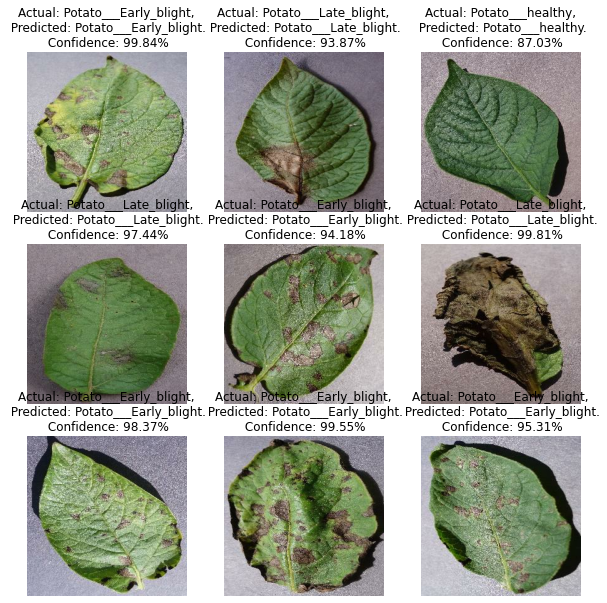

In [31]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = Class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break